# GHG emissions of EU in a given year

This notebooks details the data preparation and plotting of pie chart showing the greenhouse gas emissions in the EU.

In [1]:
from datetime import date
import os
import sys

import pandas as pd

# Add the root dir to the path, so we can load the module.
sys.path.append(os.path.abspath("../../../"))

from data_analysis.emissions_pie_chart import *
from data_analysis.illustrator_strings import *
from data_analysis.texts_emissions import *
from data_analysis.allowances_utils import get_allowances_data
from data_analysis.eurostat_crf_utils import get_eurostat_crf_data
from data_analysis.eurostat_geo import Geo
from data_analysis.eurostat_population_utils import get_eurostat_population_data

### 1. The structure of the pie charts is defined (using CRF codes and EUA permit codes)

In [2]:
GEO = Geo.EU27
YEAR = 2021
TOTAL_EMISSION = 'TOTX4_MEMONIA'

definition = [
    {'id': 'industry',
     'label': 'Průmysl',
     'codes': ['CRF2', 'CRF1A2', 'CRF1A1B', 'CRF1A1C', 'CRF1A3E', 'CRF1B'],
     'color': '#7363bd',
     'breakdown': [
         {'id': 'fuels',
          'label': 'Těžba, zpracování a transport paliv',
          'color': '#7a45a1',
          'codes': ['CRF1A1B', 'CRF1A1C', 'CRF1A3E', 'CRF1B']},
         {'id': 'mineral',
          'label': 'Cement a jiné minerály',
          'color': '#7a45a1',
          'codes': ['CRF1A2F', 'CRF2A']},
         {'id': 'metal',
          'label': 'Ocel a jiné kovy',
          'color': '#6e3394',
          'codes': ['CRF1A2A', 'CRF1A2B', 'CRF2C']},
         {'id': 'chemical',
          'label': 'Chemický průmysl',
          'color': '#6e3394',
          'codes': ['CRF1A2C', 'CRF2B']},
         {'id': 'f-gases',
          'label': 'F-plyny',
          'color': '#6e3394',
          'codes': ['CRF2F']},
         {'id': 'other',
          'label': '',
          'color': '#ffffff00',
          'reminder': True},
     ]},
    {'id': 'transport',
     'label': 'Doprava (včetně letecké)',
     'codes': ['CRF1A3A', 'CRF1A3B', 'CRF1A3C', 'CRF1A3D', 'CRF1D1A'],
     'color': '#a10014',
     'breakdown': [
         {'id': 'cars',
          'label': 'Osobní automobilová doprava',
          'color': '#73000c',
          'codes': ['CRF1A3B1']},
         {'id': 'trucks-buses',
          'label': 'Nákladní a autobusová doprava',
          'color': '#8f0a19',
          'codes': ['CRF1A3B2', 'CRF1A3B3']},
         {'id': 'airplanes',
          'label': 'Letecká doprava',
          'color': '#94545c',
          'codes': ['CRF1D1A', 'CRF1A3A']},
         {'id': 'other',
          'label': '',
          'color': '#ffffff00',
          'reminder': True}
     ]},
    {'id': 'electricity-heat',
     'label': 'Výroba elektřiny a tepla',
     'codes': ['CRF1A1A'],
     'color': '#ff4245',
    },
    {'id': 'agriculture',
     'label': 'Zemědělství',
     'codes': ['CRF1A4C', 'CRF3'],
     'color': '#1ecfbd'},
    {'id': 'buildings',
     'label': 'Budovy',
     'codes': ['CRF1A4A', 'CRF1A4B'],
     'color': '#00007f'},
    {'id': 'waste',
     'label': 'Odpadové hospodářství',
     'codes': ['CRF5'],
     'color': '#029485'},
    {'id': 'other',
     'label': 'Jiné',
     'color': '#f8c551',
     'reminder': True}
]


### 2. Emissions values (in megatons) are loaded for all CRF codes

In [3]:
df = get_eurostat_crf_data(GEO, YEAR)
df


,value
src_crf,
CRF1,2662.74608
CRF1A,2601.56797
CRF1A1,840.44661
CRF1A1A,716.98300
CRF1A1B,92.82854
...,...
TOTX4_MEMONIA,3541.45464
TOTX4_MEMONIT,3670.54074
TOTXMEMO,3241.71565


### 3. List of inner and outer wedges is generated and printed into a CSV file (for processing in Illustrator)

In [4]:
total_value = get_emissions_value(TOTAL_EMISSION, df)
inner_wedges = get_emissions_wedges(definition, total_value, df)
inner_dict = {wedge.id: wedge.value for wedge in inner_wedges}

outer_wedges = []
for wedge_def in definition:
    if 'breakdown' in wedge_def:
        parent_id = wedge_def['id']
        parent_value = inner_dict[parent_id]
        outer_wedges += get_emissions_wedges(
            wedge_def['breakdown'], parent_value, df, parent_id)

df_wedges = print_emissions_wedges_to_csv(inner_wedges + outer_wedges, f"{GEO.value}-wedges.csv")
df_wedges

,value,parent_id,label
id,,,
industry,946.80740,None,Průmysl
transport,847.16341,None,Doprava (včetně letecké)
electricity-heat,716.98300,None,Výroba elektřiny a tepla
agriculture,456.32480,None,Zemědělství
buildings,454.63956,None,Budovy
waste,109.28357,None,Odpadové hospodářství
other,10.25290,None,Jiné
industry_fuels,189.33331,industry,"Těžba, zpracování a transport paliv"
industry_mineral,188.45842,industry,Cement a jiné minerály


### 4. Strings (with occasional data) are generated for Illustrator.

In [5]:
population = get_eurostat_population_data(GEO, YEAR)
emissions_per_person = total_value * 1_000_000 / population

strings: dict[str, str] = {
  "country-name-l": "v EU",
  "country-name-g": "Evropské unie",
  "year": YEAR,
  "total-weight": czech_float(total_value, 2),
  "total-per-person": czech_float(emissions_per_person, 2),
  "lulucf-emissions": czech_float(get_emissions_value("CRF4", df), 2),
  "data-source": "Evropská agentura pro životní prostředí",
  "version": date.today().strftime("%Y-%m-%d"),
  "slug": "emise-eu",
}
df_strings = print_illustrator_strings_to_csv(strings, f"{GEO.value}-strings.csv")
df_strings

,value
id,
country-name-l,v EU
country-name-g,Evropské unie
year,2021
total-weight,"3 541,45"
total-per-person,"7,92"
lulucf-emissions,"−229,98"
data-source,Evropská agentura pro životní prostředí
version,2023-09-22
slug,emise-eu


### 5. A nested pie chart is generated (as a rough version of the final plot)

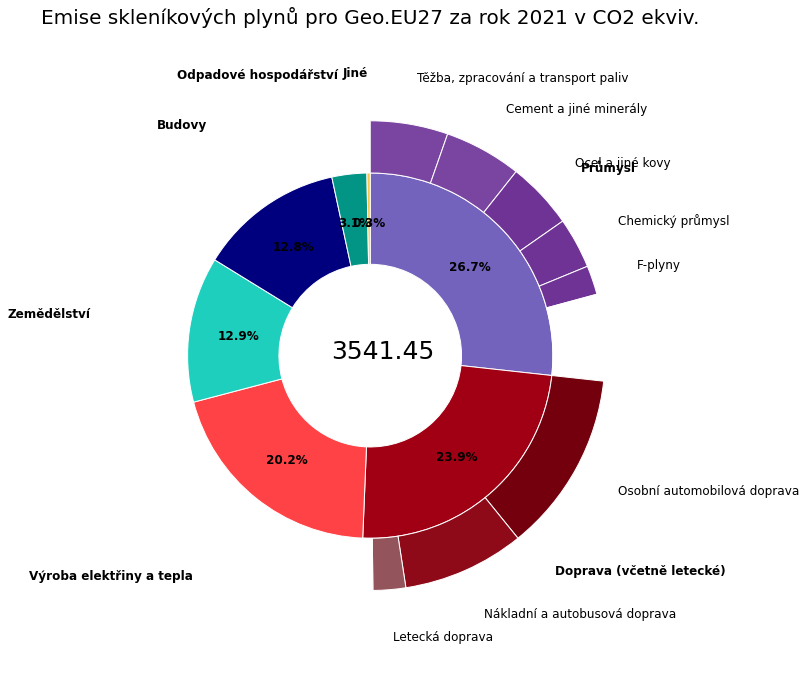

In [6]:
draw_emissions_pie_chart(GEO, YEAR, inner_wedges, outer_wedges, total_value)

### 6. Generate accompanying text for the web

Don't forget to update the Google Sheet link!

In [7]:
accompanying_text = f'''---
layout:         infographic
title:          "Emise skleníkových plynů v EU podle sektorů detailně"
slug:           "{strings["slug"]}"
redirect_from:  "/{strings["slug"]}"
published:      2022-07-14
weight:         51
tags-scopes:    [ eu ]
tags-topics:    [ emise ]
caption:        "Rozložení celkových emisí skleníkových plynů (v tunách CO<sub>2</sub> ekvivalentu) v EU za rok {YEAR} v jednotlivých sektorech lidské činnosti. Roční objem emisí Evropské unie je {strings["total-weight"]} mil. tun (údaj z roku {YEAR}). V přepočtu na obyvatele to je {strings["total-per-person"]} tun CO<sub>2</sub>eq/obyvatele."
data-our:       "https://docs.google.com/spreadsheets/d/1SUaWGbKA3TVcXd-ZXH0zNXVZGikcX8iTPJTzGihubHQ/edit?usp=sharing"
data-orig:  [   
    ["Eurostat", "https://ec.europa.eu/eurostat/web/products-datasets/-/ENV_AIR_GGE"]
]
---

## Jak číst tento graf?

{get_gases_info()}

Roční objem emisí Evropské unie je {strings["total-weight"]} mil. tun CO<sub>2</sub>eq (údaj z roku {YEAR}). __V přepočtu na obyvatele to je {strings["total-per-person"]} tun CO<sub>2</sub>eq/obyvatele.__ Zobrazujeme emise EU-27, tedy zemí, které byly k roku {YEAR} členy EU (data tak nezahrnují Velkou Británii).

## Co znamenají jednotlivé sektory?

* {get_sectoral_info(Sector.INDUSTRY, GEO, df_wedges, df, total_value, population)}
* {get_sectoral_info(Sector.TRANSPORT, GEO, df_wedges, df, total_value, population)}
* {get_sectoral_info(Sector.ELECTRICITY_HEAT, GEO, df_wedges, df, total_value, population)}
* {get_sectoral_info(Sector.AGRICULTURE, GEO, df_wedges, df, total_value, population)}
* {get_sectoral_info(Sector.BUILDINGS, GEO, df_wedges, df, total_value, population)}
* {get_sectoral_info(Sector.WASTE, GEO, df_wedges, df, total_value, population)}

Pro snadnější možnost srovnávání emisí [napříč státy EU](/infografiky/emise-vybrane-staty) vynecháváme kategorii lesnictví a využití půdy (která bývá označována _LULUCF_ podle anglického _Land use, land use change, forestry_). Díky ukládání uhlíku v zeleni má totiž tato kategorie ve většině států EU záporné emise, což komplikuje vizualizaci. Sektor LULUCF se také často ze srovnávání [vynechává](https://climateactiontracker.org/methodology/indc-ratings-and-lulucf/), protože jednak obsahuje vysokou nejistotu v datech, neboť záporné hodnoty mohou zakrývat _strukturální_ emise z energetiky, průmyslu a zemědělství, a jednak je tento sektor náchylnější na výkyvy v čase. Právě v Česku jsme v posledních letech svědky výrazného výkyvu kvůli masivní těžbě dřeva při kůrovcové kalamitě. Na úrovni EU emise v tomto sektoru dosáhly v roce {YEAR} záporné hodnoty {strings["lulucf-emissions"]} Mt CO<sub>2</sub>eq.

## Poznámky k datům o emisích
{get_methodology_info()}

Údaje odpovídají emisím vyprodukovaným v Evropské unii, avšak vzhledem k vývozu a dovozu zboží nemusejí odpovídat emisím vzniklých ze spotřeby. Země EU např. do třetích zemí mimo EU vyváží ocel, automobily apod. a dováží zboží z jiných třetích zemí, např. z Číny. Zahrnutí letecké dopravy je podobně problematické - zobrazený příspěvek letecké dopravy odpovídá emisím vyprodukovaným {get_flights_info(GEO)}.
'''
print(accompanying_text)


---
layout:         infographic
title:          "Emise skleníkových plynů v EU podle sektorů detailně"
slug:           "emise-eu"
redirect_from:  "/emise-eu"
published:      2022-07-14
weight:         51
tags-scopes:    [ eu ]
tags-topics:    [ emise ]
caption:        "Rozložení celkových emisí skleníkových plynů (v tunách CO<sub>2</sub> ekvivalentu) v EU za rok 2021 v jednotlivých sektorech lidské činnosti. Roční objem emisí Evropské unie je 3 541,45 mil. tun (údaj z roku 2021). V přepočtu na obyvatele to je 7,92 tun CO<sub>2</sub>eq/obyvatele."
data-our:       "https://docs.google.com/spreadsheets/d/1SUaWGbKA3TVcXd-ZXH0zNXVZGikcX8iTPJTzGihubHQ/edit?usp=sharing"
data-orig:  [   
    ["Eurostat", "https://ec.europa.eu/eurostat/web/products-datasets/-/ENV_AIR_GGE"]
]
---

## Jak číst tento graf?

Všechny hodnoty v grafu jsou <glossary id="antropogennisklenikoveplyny">antropogenní emise</glossary> skleníkových plynů CO<sub>2</sub>, N<sub>2</sub>O, CH<sub>4</sub>, HFC, PFC, SF<sub>6</sub>